Import der Module
------------------------------------------

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cv2.getAffineTransform

Änderung des Maßstabs:
------------------------------------------

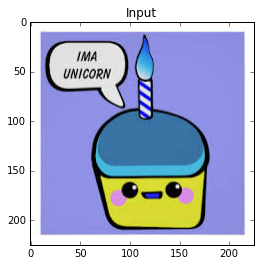

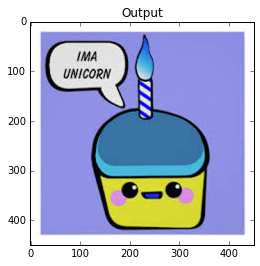

In [6]:
img = cv2.imread('Unicorn.jpg')

skaliert = cv2.resize(img,None,fx=0.5, fy=1,interpolation = cv2.INTER_CUBIC) #Skalierung in x- und y-Richtung, Festlegung der Resampling Methode

#Oder

#height, width = img.shape[:2]
#skaliert = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.imshow(img)
plt.title('Input')
plt.show()

plt.imshow(skaliert)
plt.title('Output')
plt.show()

#cv2.imshow('img',img)
#cv2.waitKey(0)

#cv2.imshow('Skaliert',skaliert)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Translation:
------------------------------------------

In [8]:
img = cv2.imread('Unicorn.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,50],[0,1,20]]) #Festlegung der Translationsmatrix, zuerst in x-Richtung und dann in y-Richtung
translation = cv2.warpAffine(img,M,(cols,rows)) #Durchführung der Transformation

cv2.imshow('Input',img)
cv2.waitKey(0)

cv2.imshow('Translation',translation)
cv2.waitKey(0)
cv2.destroyAllWindows()

Rotation:
------------------------------------------

In [12]:
img = cv2.imread('Unicorn.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),10,1) #Festlegung der Rotationsmatrix
rotiert = cv2.warpAffine(img,M,(cols,rows)) #Durchführung der Transformation

#rotiert90deg=np.rot90(img,1) #Rotation um 90 Grad, Bildgröße bleibt erhalten/wird mitgedreht

cv2.imshow('Drehung',rotiert)
cv2.waitKey(0)
cv2.destroyAllWindows()

Affintransformation:
------------------------------------------

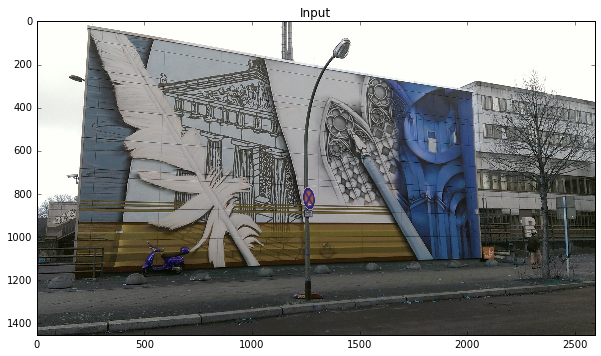

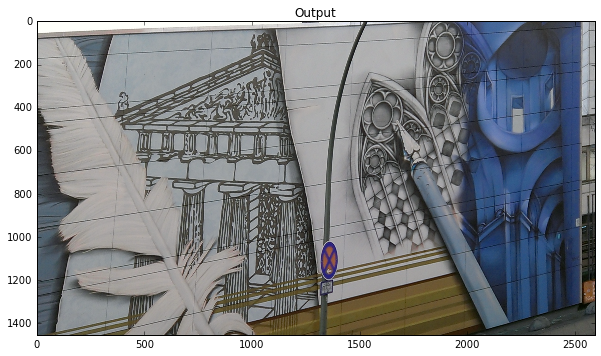

In [22]:
graffiti = cv2.imread('graffiti.jpg')
rows,cols,ch = graffiti.shape

pts1 = np.float32([[300,0],[2000,350],[2050,1150]]) #Passpunkte im Eingabebild
pts2 = np.float32([[0,0],[2500,0],[2500,1400]]) #Passpunkte im Ausgabebild

M = cv2.getAffineTransform(pts1,pts2) #Ermitteln der Transformationsmatrix, pts1-src, pts2-dst

affin = cv2.warpAffine(graffiti,M,(cols,rows)) #Durchführen der Transformation

plt.figure(figsize=(10,20))
plt.imshow(graffiti)
plt.title('Input')

plt.figure(figsize=(10,20))
plt.imshow(affin)
plt.title('Output')
plt.show()

Projektivtransformation:
------------------------------------------

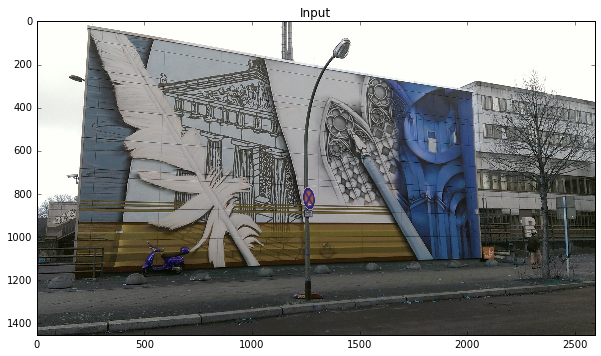

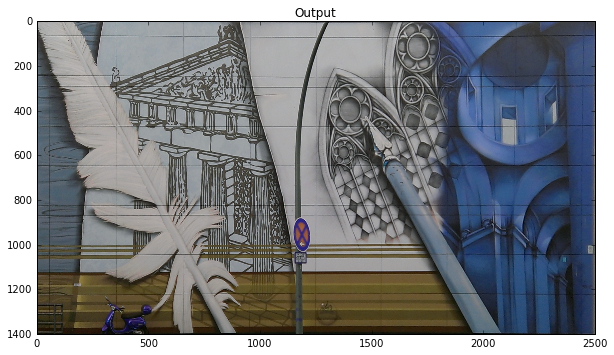

In [23]:
feder = cv2.imread('graffiti.jpg')
rows,cols,ch = feder.shape

pts1 = np.float32([[250,40],[2015,335],[175,1170],[2065,1100]]) #Passpunkte im Eingabebild
pts2 = np.float32([[0,0],[2500,0],[0,1400],[2500,1400]]) #Passpunkte im Ausgabebild

M = cv2.getPerspectiveTransform(pts1,pts2) #Ermitteln der Transformationsmatrix

projektiv = cv2.warpPerspective(feder,M,(2500,1400)) #Durchführen der Transformation

plt.figure(figsize=(10,20))
plt.imshow(feder)
plt.title('Input')

plt.figure(figsize=(10,20))
plt.imshow(projektiv)
plt.title('Output')
plt.show()